In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)


In [4]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) & 
    (df['value'] <= df['value'].quantile(0.975))
]

Text(0, 0.5, 'Page Views')

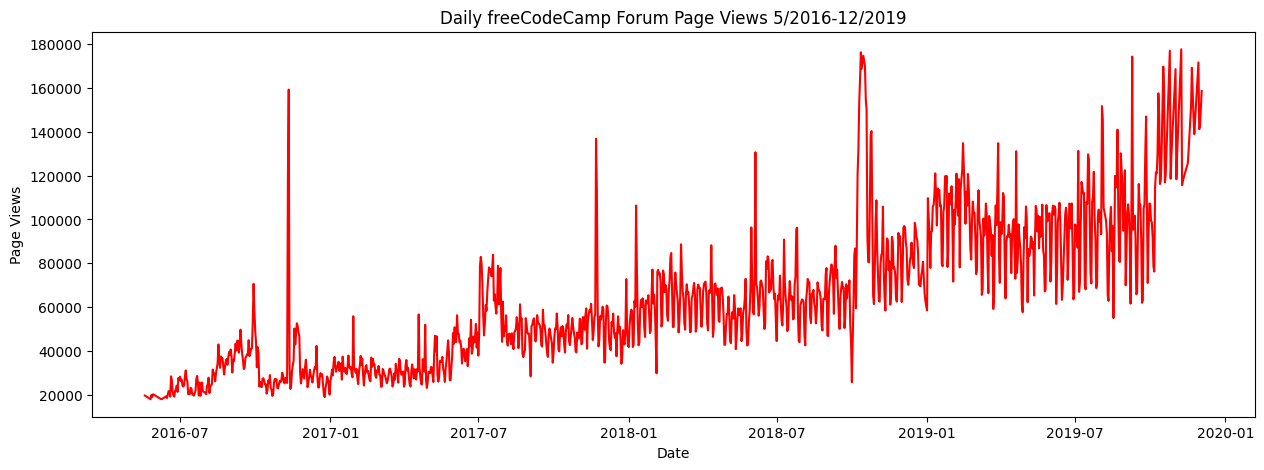

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [6]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()

<Axes: xlabel='year'>

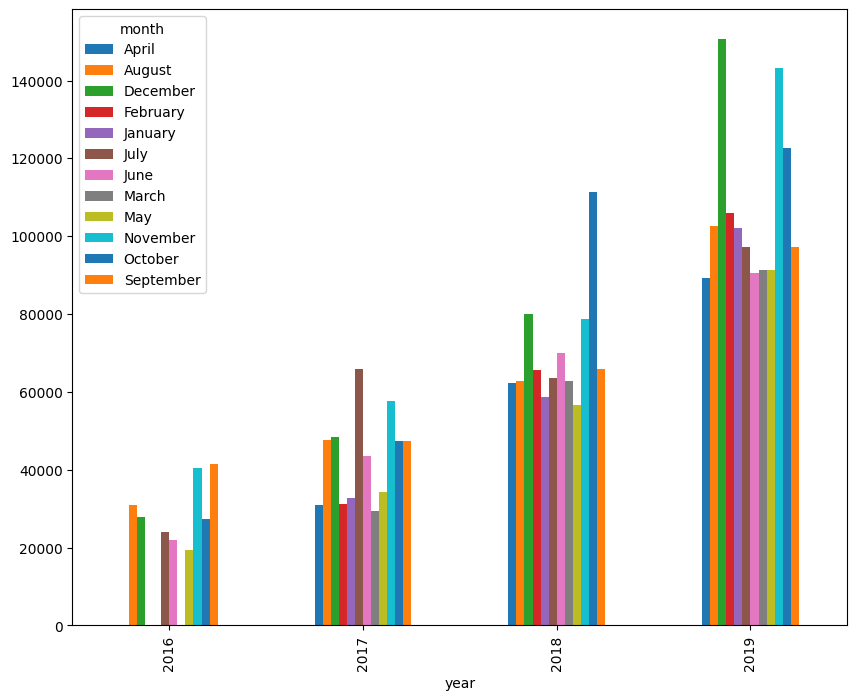

In [7]:
df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
df_grouped.plot(kind='bar', figsize=(10, 8))

In [8]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

<Axes: xlabel='month', ylabel='value'>

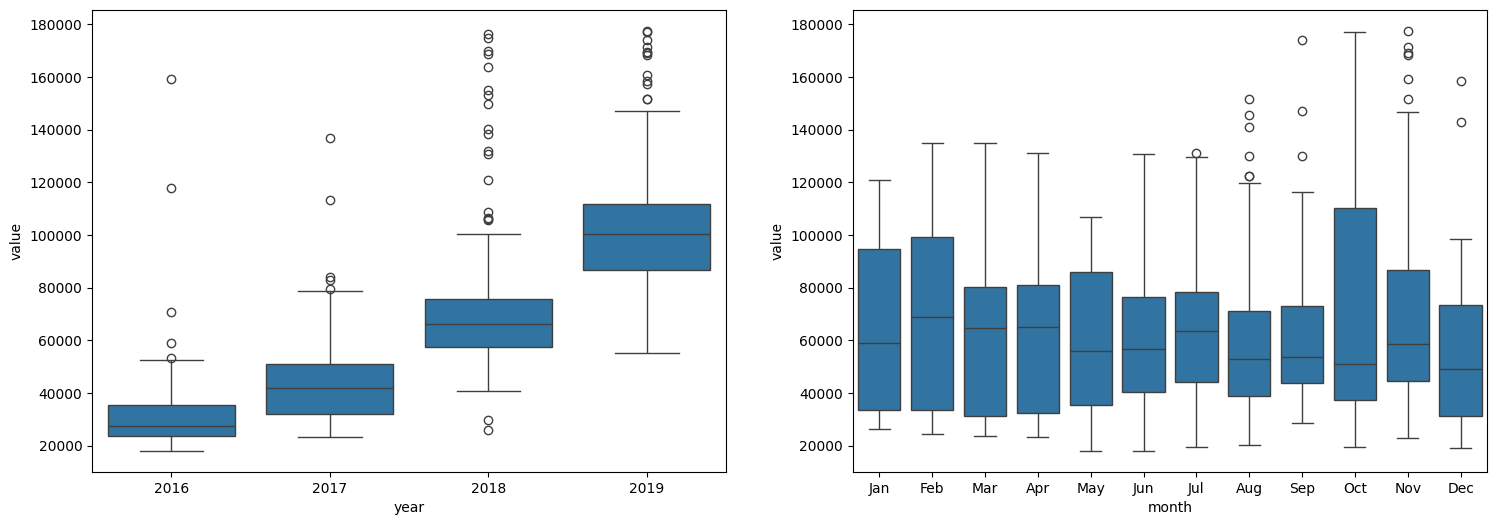

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
sns.boxplot(x='month', y='value', data=df_box, ax=ax2)